<a href="https://colab.research.google.com/github/TTReza/Pytorch_Knowledge/blob/master/simple_neural_network_Irisdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [27]:
#create a model class (nn.Module)

class Model(nn.Module):
  #input layer --> hidden layer1 --> hidden layer2 --> output
  def __init__(self, in_features = 4, h1 = 10, h2 = 10, out_features = 3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [28]:
#pick manual seed for randomization
torch.manual_seed(41)

#create instance
model = Model()

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
import pandas as pd

In [31]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'

my_df = pd.read_csv(url)

In [32]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [33]:
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [34]:
#Train test Split

X = my_df.drop('variety', axis =1)
y = my_df['variety']


In [35]:
#convert to numpy arrays
import numpy as np

X = X.values
y = y.values

In [36]:
from sklearn.model_selection import train_test_split


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [38]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [19]:
print(y_train.dtype)
print(y_test.dtype)

object
object


In [39]:
print(f"y_train: {y_train}")
print(f"y_test: {y_test}")

y_train: [1. 2. 2. 1. 2. 1. 2. 1. 0. 2. 1. 0. 0. 0. 1. 2. 0. 0. 0. 1. 0. 1. 2. 0.
 1. 2. 0. 2. 2. 1. 1. 2. 1. 0. 1. 2. 0. 0. 1. 1. 0. 2. 0. 0. 1. 1. 2. 1.
 2. 2. 1. 0. 0. 2. 2. 0. 0. 0. 1. 2. 0. 2. 2. 0. 1. 1. 2. 1. 2. 0. 2. 1.
 2. 1. 1. 1. 0. 1. 1. 0. 1. 2. 2. 0. 1. 2. 2. 0. 2. 0. 1. 2. 2. 1. 2. 1.
 1. 2. 2. 0. 1. 2. 0. 1. 2.]
y_test: [1. 0. 2. 1. 1. 0. 1. 2. 1. 1. 2. 0. 0. 0. 0. 1. 2. 1. 1. 2. 0. 2. 0. 2.
 2. 2. 2. 2. 0. 0. 0. 0. 1. 0. 0. 2. 1. 0. 0. 0. 2. 1. 1. 0. 0.]


In [40]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [41]:
#set criterion of model to measure the error
criterion = nn.CrossEntropyLoss()

#choose optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [42]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=3, bias=True)
)>

In [44]:
#train our model

epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train) #predicted vs y_train

  losses.append(loss.detach().numpy())

  if i % 10 ==0:
    print(f'Epoch: {i} and loss: {loss}')

  #backpropagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1738617420196533
Epoch: 10 and loss: 0.9493087530136108
Epoch: 20 and loss: 0.6930070519447327
Epoch: 30 and loss: 0.4040285348892212
Epoch: 40 and loss: 0.23216760158538818
Epoch: 50 and loss: 0.14049702882766724
Epoch: 60 and loss: 0.09733440726995468
Epoch: 70 and loss: 0.07922890782356262
Epoch: 80 and loss: 0.07123072445392609
Epoch: 90 and loss: 0.06721452623605728


Text(0.5, 0, 'epoch')

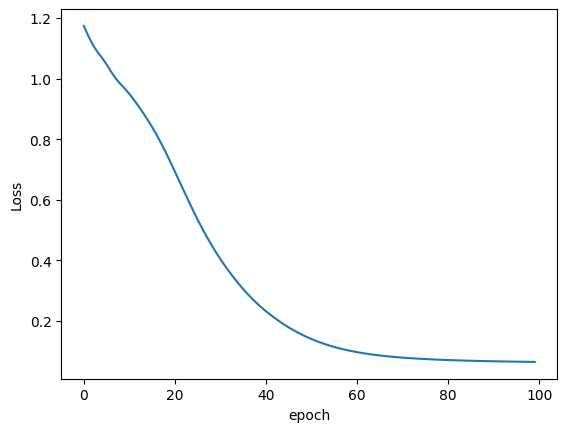

In [45]:
#graph the losses

plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel('epoch')

In [46]:
#evaluate model on test data set

with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test) #finding the loss


In [47]:
loss

tensor(0.0318)

In [50]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    print(f'{i+1}.) {str(y_val)} \t {y_test[i]}')

    if y_val.argmax().item() == y_test[i]:
      correct +=1


print(f'We got {correct} correct')

1.) tensor([-2.1288,  6.5109,  2.3158]) 	 1
2.) tensor([11.2947,  2.4671, -9.0225]) 	 0
3.) tensor([-9.2202,  0.9504, 14.9179]) 	 2
4.) tensor([-2.3664,  6.2247,  2.7595]) 	 1
5.) tensor([-2.4547,  7.0112,  2.7814]) 	 1
6.) tensor([10.4532,  2.5282, -8.3819]) 	 0
7.) tensor([-0.1190,  6.5684, -0.3266]) 	 1
8.) tensor([-4.9283,  4.7049,  7.2424]) 	 2
9.) tensor([-3.3257,  5.3784,  4.4906]) 	 1
10.) tensor([-0.7622,  6.9055,  0.3013]) 	 1
11.) tensor([-4.2345,  4.9241,  6.0520]) 	 2
12.) tensor([10.4089,  1.8762, -8.3195]) 	 0
13.) tensor([11.9903,  2.0452, -9.5450]) 	 0
14.) tensor([10.3947,  1.9680, -8.3115]) 	 0
15.) tensor([11.2597,  1.9815, -8.9802]) 	 0
16.) tensor([-2.2760,  6.7130,  2.5277]) 	 1
17.) tensor([-6.6134,  2.3936, 10.3812]) 	 2
18.) tensor([-0.9542,  6.7443,  0.5008]) 	 1
19.) tensor([-2.1800,  6.0251,  2.4794]) 	 1
20.) tensor([-6.5365,  2.3520, 10.2657]) 	 2
21.) tensor([ 9.7880,  2.0293, -7.8470]) 	 0
22.) tensor([-3.8173,  4.8546,  5.3733]) 	 2
23.) tensor([ 9.799

In [51]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 1.0])

In [52]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 8.0122,  2.9758, -6.5306])


In [53]:
#save NN model

torch.save(model.state_dict(), 'iris_model_nn.pt')

In [54]:
#Load the model
new_model = Model()
new_model.load_state_dict(torch.load('iris_model_nn.pt'))

<All keys matched successfully>

In [55]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=3, bias=True)
)